In [4]:
# 📌 Step 1: Import the tools we need to work with data
import pandas as pd              # helps us read and work with data
import matplotlib.pyplot as plt  # helps us make pictures from data
import seaborn as sns            # makes pretty pictures (graphs)

# this makes our graphs look a bit nicer
sns.set(style='whitegrid')
%matplotlib inline


In [30]:
# 📌 Step 2: Load the data (like opening a notebook to see what's inside)
df = pd.read_csv('C:\\Users\\vaibh\\Downloads\\train.csv')
 # this opens the file and puts it into 'df'
df.head()  # show the first 5 rows so we know what it looks like


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
# 📌 Step 3: Let's learn about the data (like checking how many pages and what type of info is there)
df.info()         # tells us how many columns, rows, and what kind of data is there
df.describe()     # gives us a summary like average, biggest and smallest number in each column
df.isnull().sum() # shows us if anything is missing in our notebook
df.nunique()      # tells us how many different values each column has


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

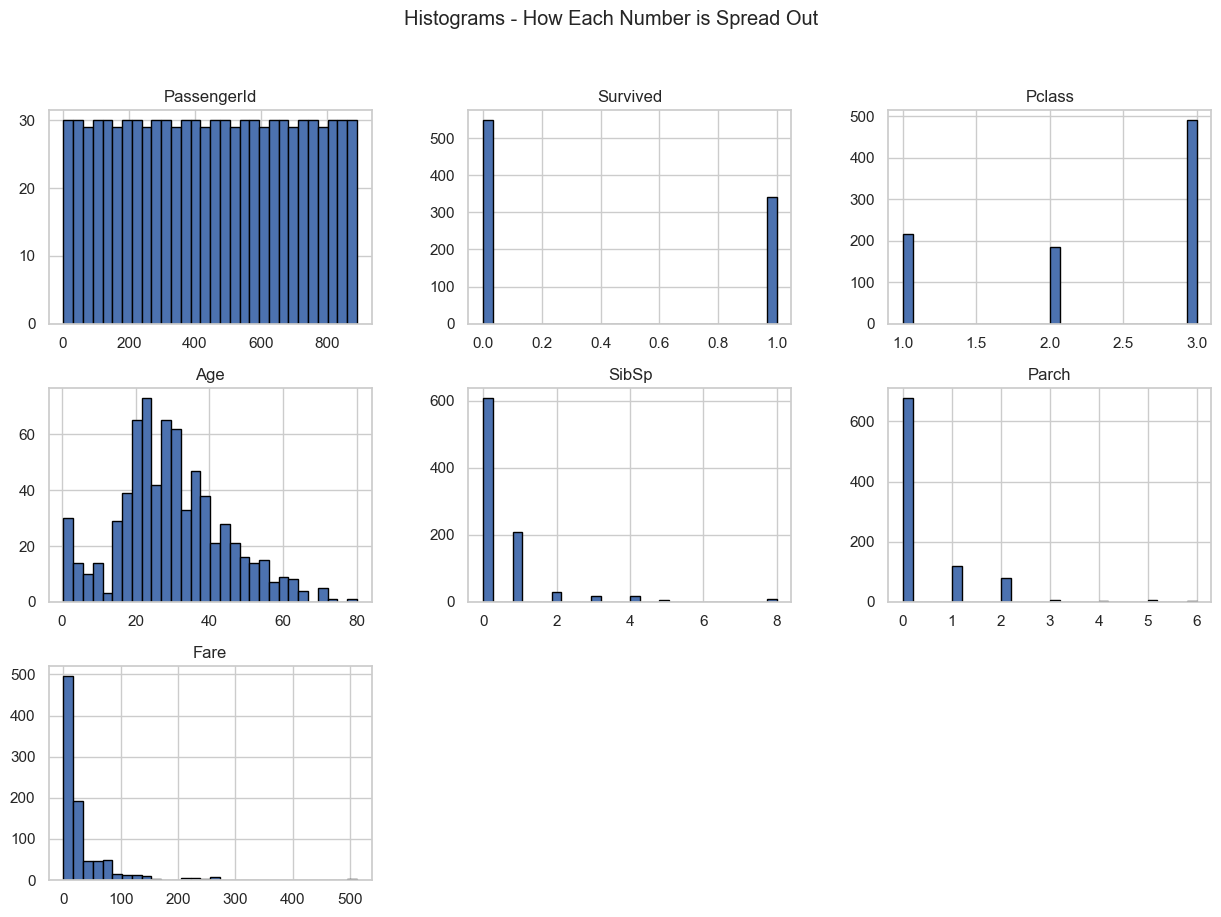

In [34]:
# 📌 Step 4: Let's see what the numbers look like using graphs (Histograms show us how things are spread out)
df.hist(bins=30, figsize=(15,10), edgecolor='black')
plt.suptitle('Histograms - How Each Number is Spread Out')
plt.show()


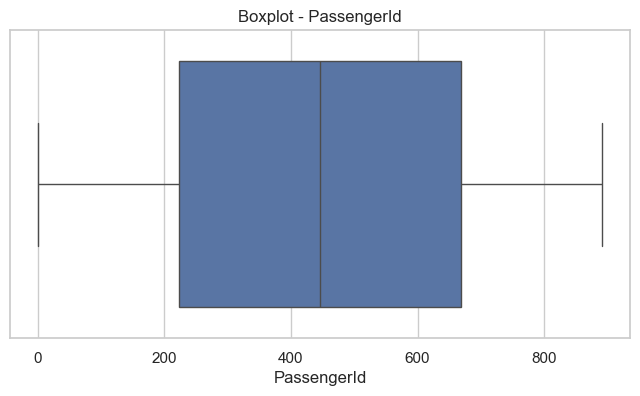

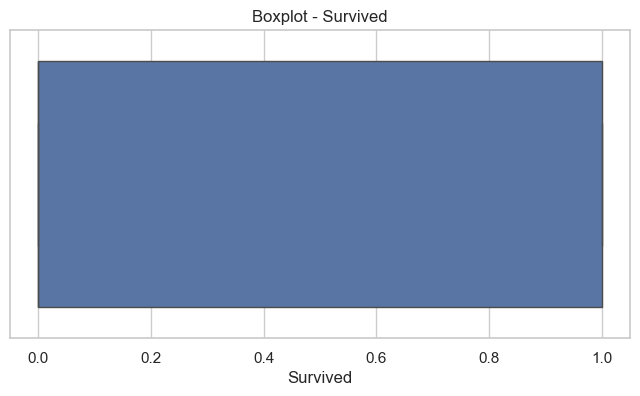

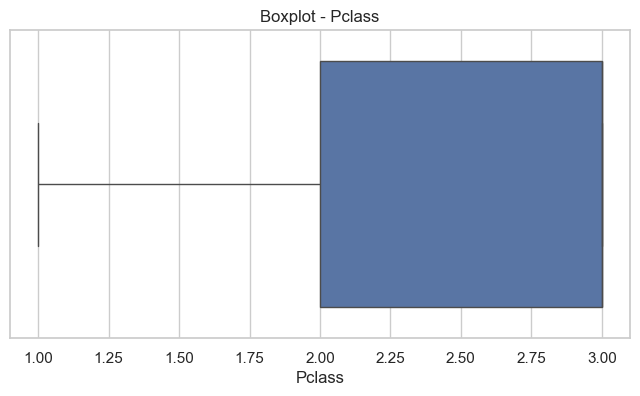

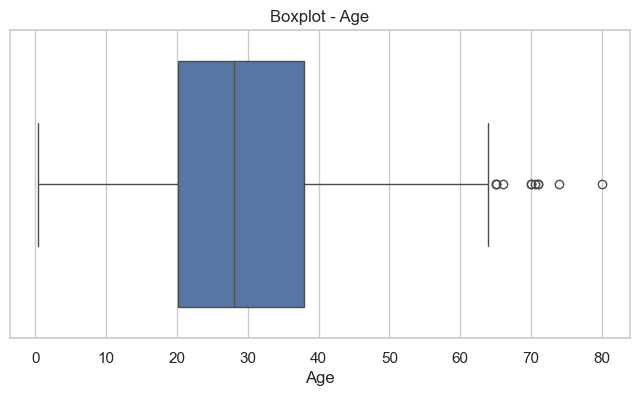

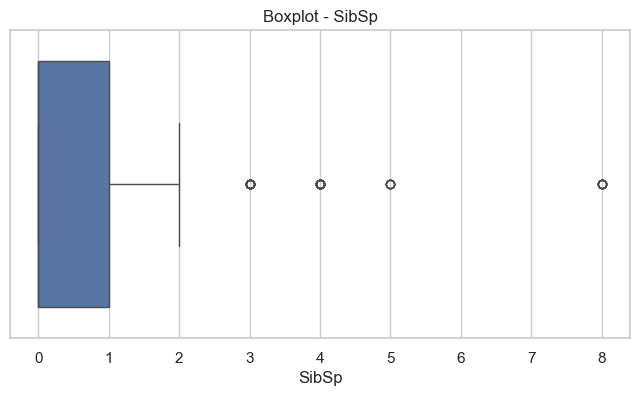

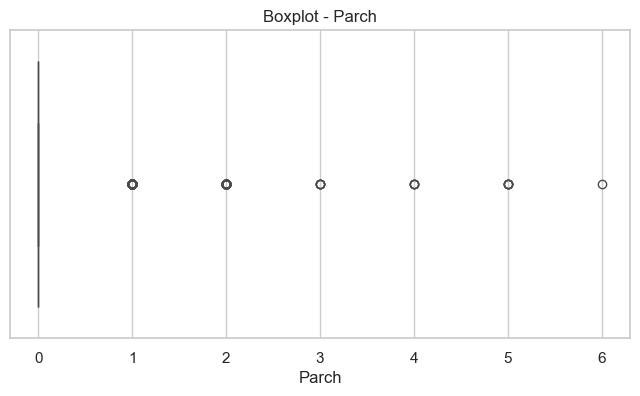

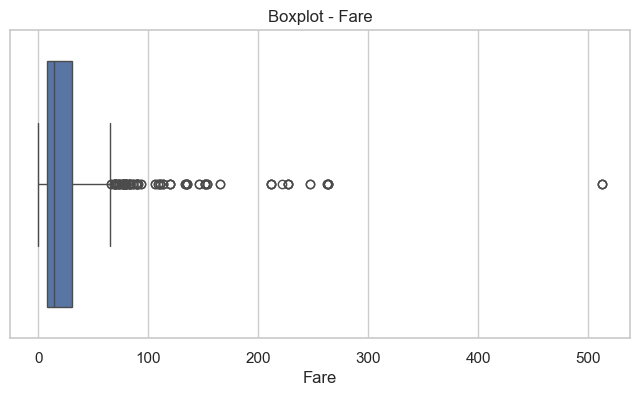

In [36]:
# 📌 Step 5: Let's look for weird or very big/small values (Boxplots help us spot outliers)
num_cols = df.select_dtypes(include='number').columns  # only choose columns with numbers
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')
    plt.show()


Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64


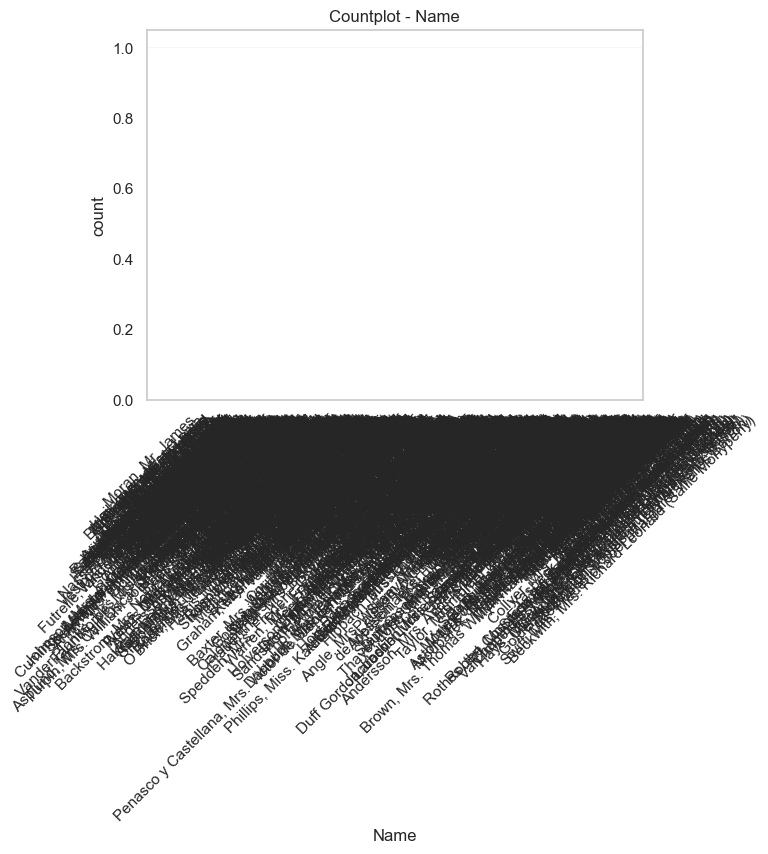

Sex
male      577
female    314
Name: count, dtype: int64


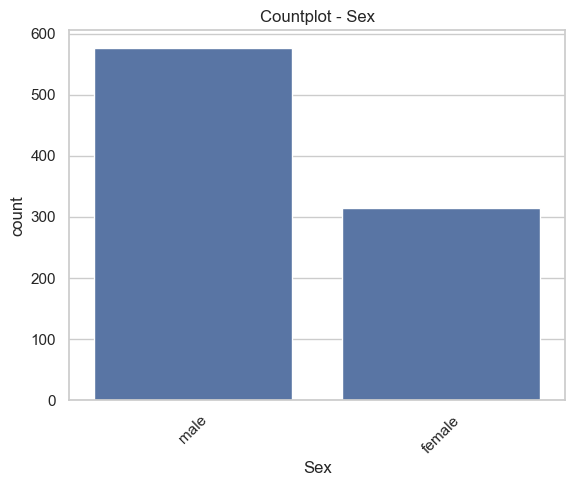

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64


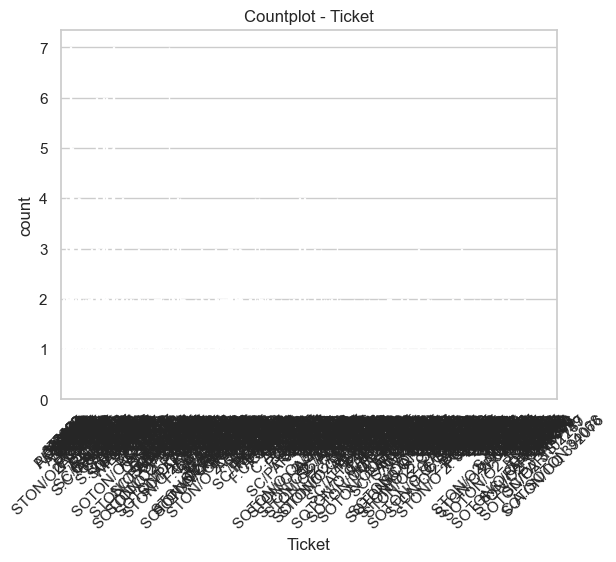

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64


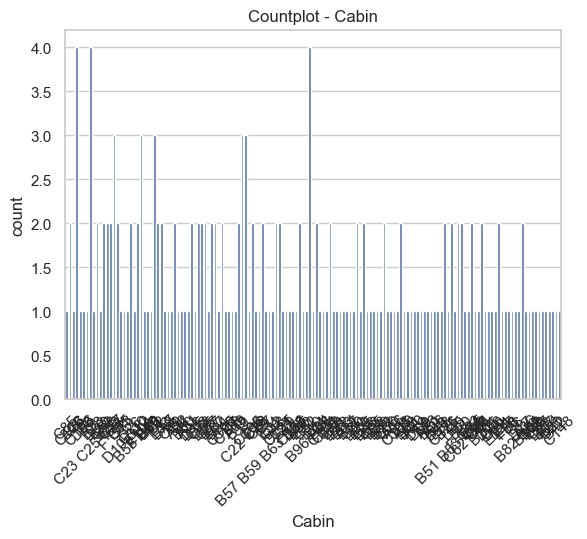

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


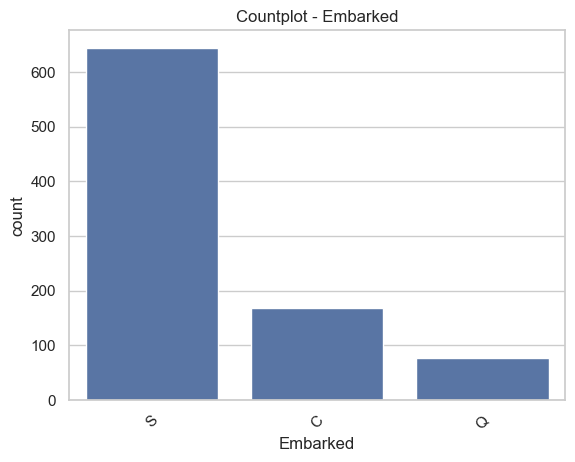

In [38]:
# 📌 Step 6: Let's check how many times each category shows up (for columns with words)
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(df[col].value_counts())  # print how many times each category appears
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot - {col}')
    plt.xticks(rotation=45)
    plt.show()


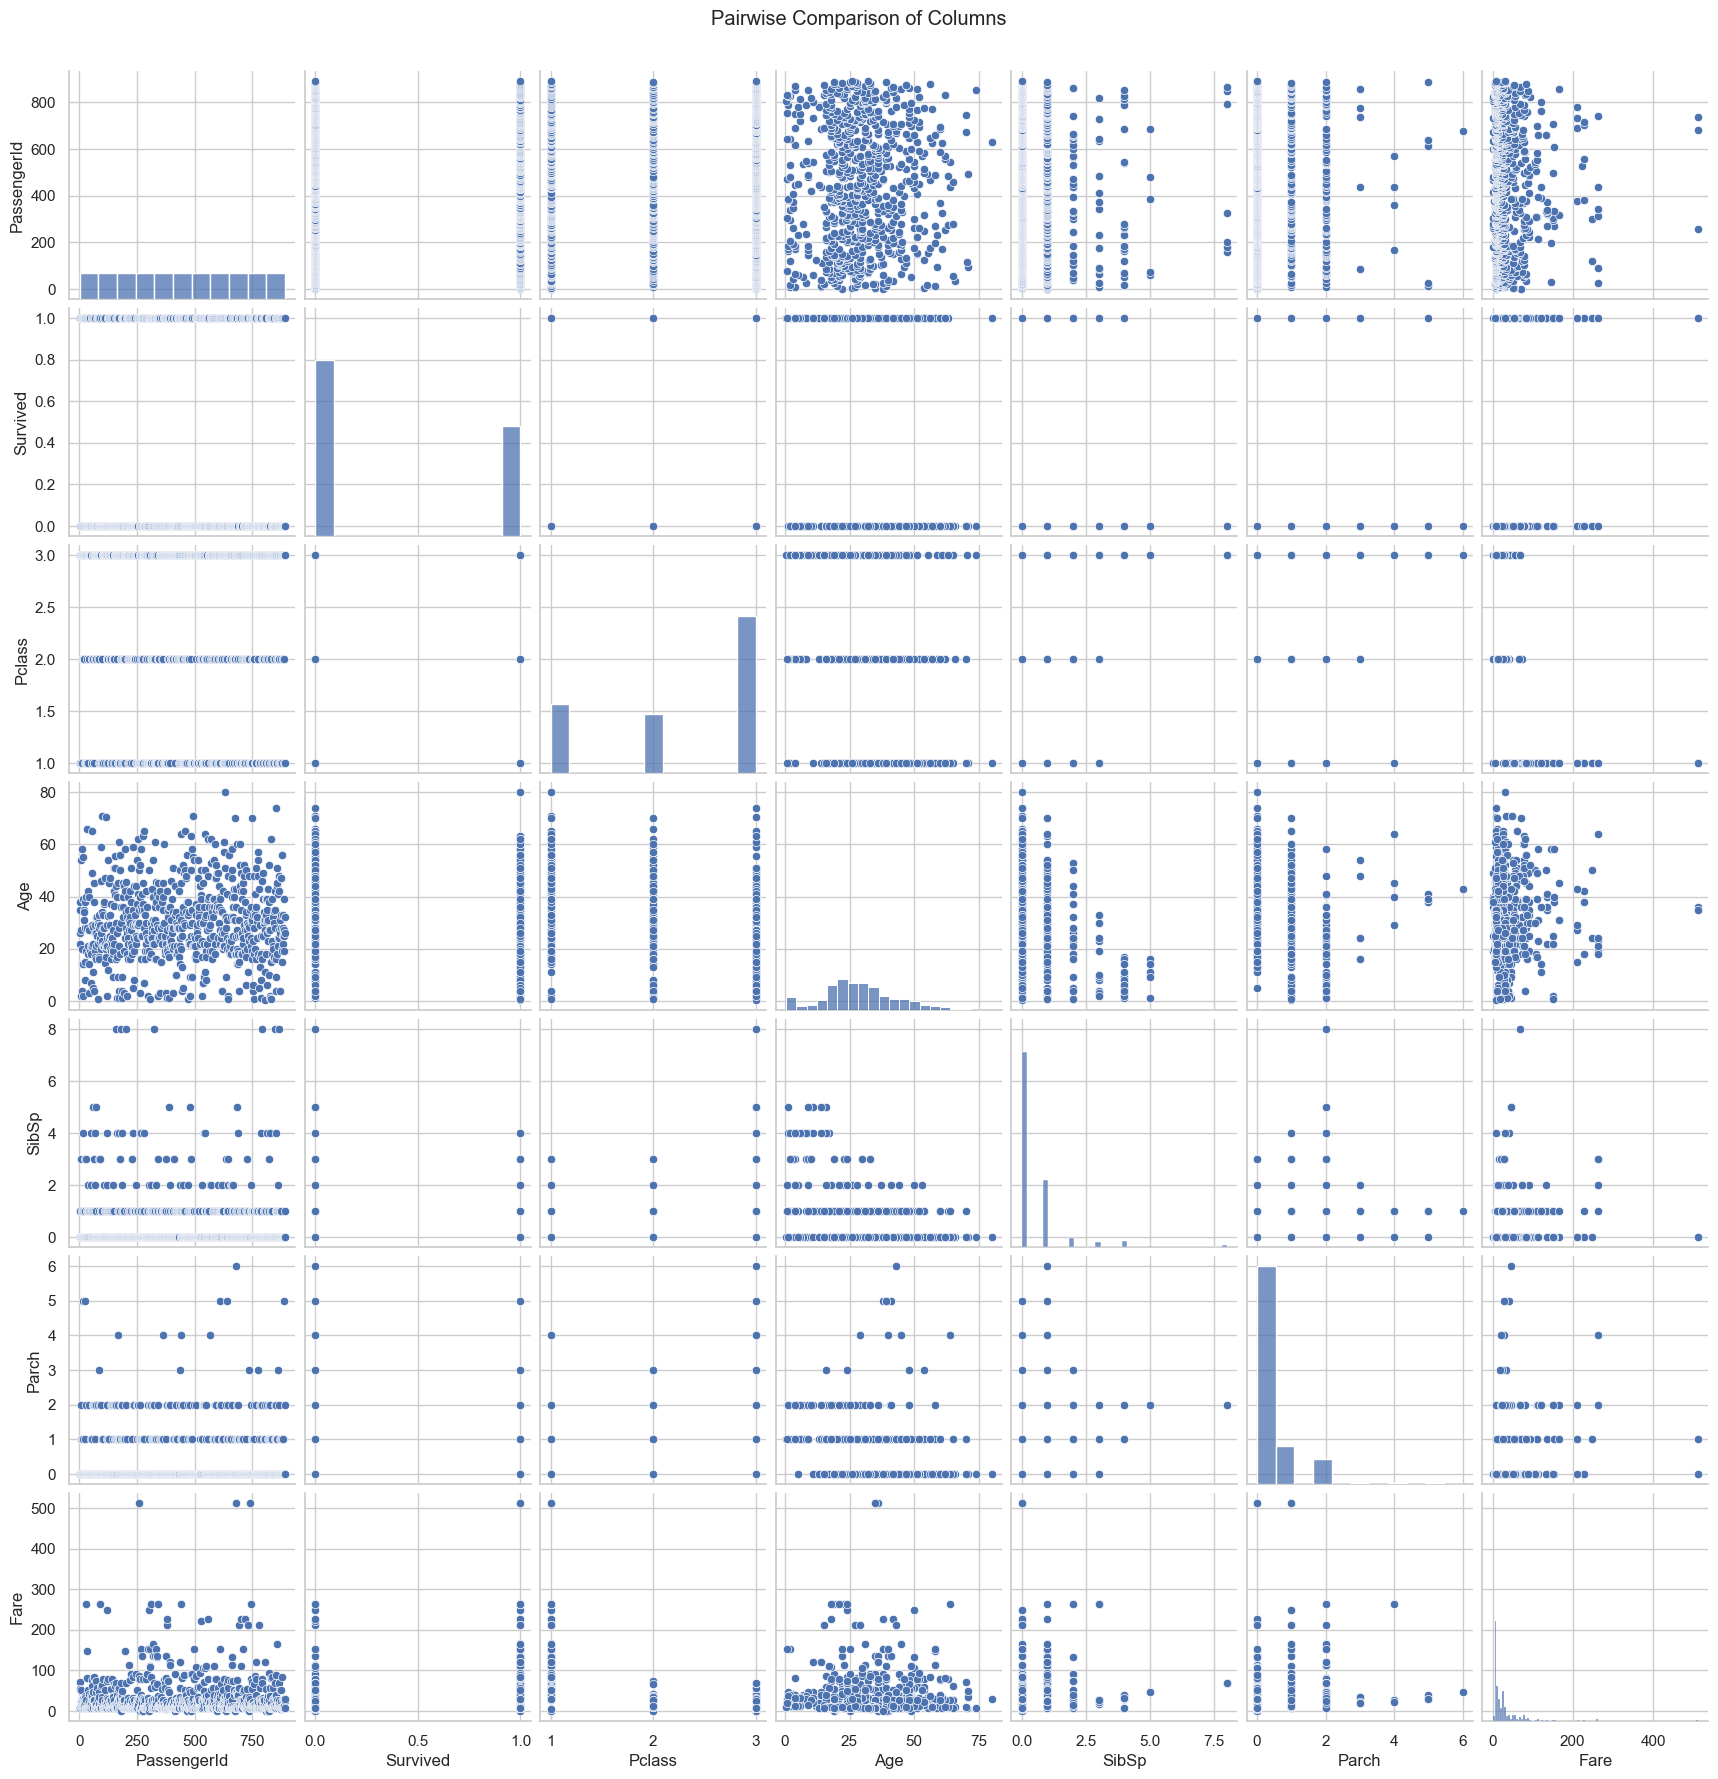

In [42]:
# 📌 Step 7: Let's see how the columns are connected (Pairplot shows 2-by-2 comparisons)
sns.pairplot(df)
plt.suptitle('Pairwise Comparison of Columns', y=1.02)
plt.show()


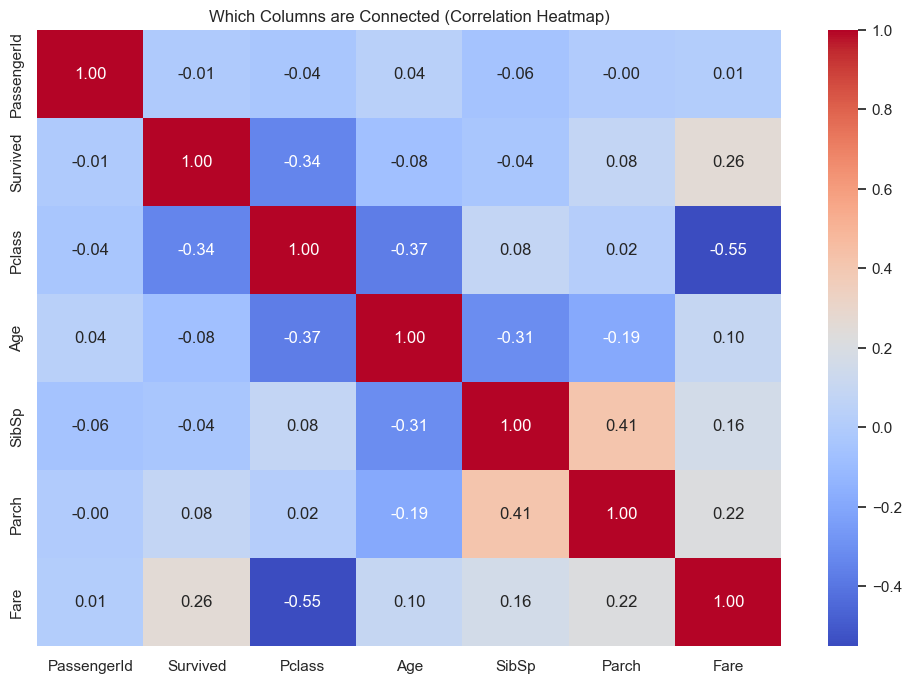

In [46]:
# ✅ Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

# 📌 Step 8: Correlation Heatmap - shows us which numbers are connected (positive or negative)
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Which Columns are Connected (Correlation Heatmap)')
plt.show()


Available columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


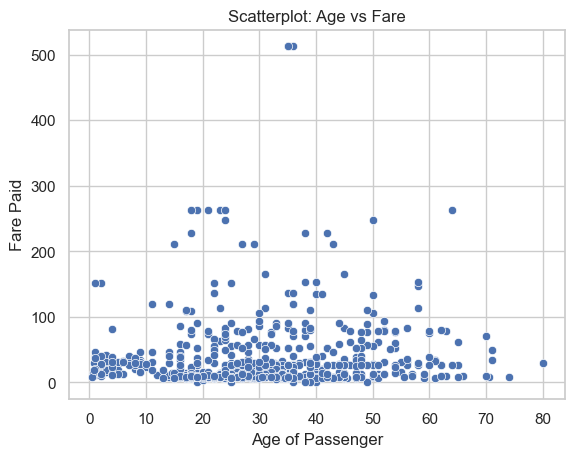

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🔍 First, let's print the column names to know what we can plot
print("Available columns:", df.columns)

# ✅ Now, we pick two real numeric features from the data: 'Age' and 'Fare'
# 📌 Scatterplot between Age (x-axis) and Fare (y-axis)
sns.scatterplot(data=df, x='Age', y='Fare')
plt.title('Scatterplot: Age vs Fare')
plt.xlabel('Age of Passenger')
plt.ylabel('Fare Paid')
plt.grid(True)
plt.show()


Summary

The dataset has 891 rows, each one representing a person and 12 columns, each one representing a feature of people.

Information like Name, Age, Sex, Ticket, Fare, Class (Pclass), and whether the person Survived or not is contained in the dataset.

Missing Data

There are 177 missing values in age variable, we need to fill/handle these before modeling.

Cabin has 687 missing values, that is a lot—it might be dropped or handled carefully.

Embarked possesses 2 missing values. This is considered to be a negligible number. It should be easy to rectify

Categorical Feature Insights

Gender: There are 577 men and 314 women. Only 314 women are fewer.

Embarked (port where passenger got on):

S = 644 people (most common)

C = 168 people

Q = 77 people

Numerical Feature Relationships

There is a high negative relationship between fare and Pclass, at a strength of -0.55. Typically the higher the fare, the higher the class.

Survived positively correlates with Fare (0.26) so that people who paid more were more likely to survive.

Pclass and Survived are negatively correlated at a value of -0.34 meaning that higher class passengers survival rate was higher.

Regarding the variable "Age", the correlation with "Survived" is weak; the value (−0.07) is close